Will the stock market go up or down on the next day?

In [51]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from xgboost import XGBClassifier, plot_tree 
import matplotlib.pyplot as plt

In [9]:
start = '2001-01-03'
end = '2005-12-31'
data = yf.download('^GSPC', start, end)

[*********************100%***********************]  1 of 1 completed


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000
...,...,...,...,...,...,...
2005-12-23,1268.119995,1269.760010,1265.920044,1268.660034,1268.660034,1285810000
2005-12-27,1268.660034,1271.829956,1256.540039,1256.540039,1256.540039,1540470000
2005-12-28,1256.540039,1261.099976,1256.540039,1258.170044,1258.170044,1422360000


In [11]:
df = data['Adj Close'].pct_change() * 100

In [12]:
df


Date
2001-01-02         NaN
2001-01-03    5.009861
2001-01-04   -1.055247
2001-01-05   -2.624236
2001-01-08   -0.191781
                ...   
2005-12-23    0.042586
2005-12-27   -0.955338
2005-12-28    0.129722
2005-12-29   -0.298052
2005-12-30   -0.488672
Name: Adj Close, Length: 1256, dtype: float64

In [13]:
df = df.rename("Today")
df = df.reset_index()

In [14]:
df

,Date,Today
0,2001-01-02,NaN
1,2001-01-03,5.009861
2,2001-01-04,-1.055247
3,2001-01-05,-2.624236
4,2001-01-08,-0.191781
...,...,...
1251,2005-12-23,0.042586
1252,2005-12-27,-0.955338
1253,2005-12-28,0.129722
1254,2005-12-29,-0.298052


In [15]:
for i in range(1, 6):
    df['Lag_' + str(i)] = df['Today'].shift(i)

In [16]:
df

,Date,Today,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
0,2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,5.009861,NaN,NaN,NaN,NaN,NaN
2,2001-01-04,-1.055247,5.009861,NaN,NaN,NaN,NaN
3,2001-01-05,-2.624236,-1.055247,5.009861,NaN,NaN,NaN
4,2001-01-08,-0.191781,-2.624236,-1.055247,5.009861,NaN,NaN
...,...,...,...,...,...,...,...
1251,2005-12-23,0.042586,0.422078,0.251667,-0.023815,-0.583902,-0.284828
1252,2005-12-27,-0.955338,0.042586,0.422078,0.251667,-0.023815,-0.583902
1253,2005-12-28,0.129722,-0.955338,0.042586,0.422078,0.251667,-0.023815
1254,2005-12-29,-0.298052,0.129722,-0.955338,0.042586,0.422078,0.251667


In [17]:
df['Volume'] = data.Volume.shift(1).values/1000_000_000
df = df.dropna()

In [18]:
#Make a labels: 1 is for up, 0 is for down

df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]

<ipython-input-18-0e1cdf4c6011>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]


In [19]:
df

,Date,Today,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Volume,Direction
6,2001-01-10,0.958639,0.381219,-0.191781,-2.624236,-1.055247,5.009861,1.19130,1
7,2001-01-11,1.031770,0.958639,0.381219,-0.191781,-2.624236,-1.055247,1.29650,1
8,2001-01-12,-0.623287,1.031770,0.958639,0.381219,-0.191781,-2.624236,1.41120,0
9,2001-01-16,0.614309,-0.623287,1.031770,0.958639,0.381219,-0.191781,1.27600,1
10,2001-01-17,0.212561,0.614309,-0.623287,1.031770,0.958639,0.381219,1.20570,1
...,...,...,...,...,...,...,...,...,...
1251,2005-12-23,0.042586,0.422078,0.251667,-0.023815,-0.583902,-0.284828,1.88850,1
1252,2005-12-27,-0.955338,0.042586,0.422078,0.251667,-0.023815,-0.583902,1.28581,0
1253,2005-12-28,0.129722,-0.955338,0.042586,0.422078,0.251667,-0.023815,1.54047,1
1254,2005-12-29,-0.298052,0.129722,-0.955338,0.042586,0.422078,0.251667,1.42236,0


In [20]:
#add a constant
df = sm.add_constant(df)

In [21]:
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Volume']

In [22]:
X = df[features]
y = df.Direction

In [23]:
model = sm.Logit(y, X)

In [24]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.691146
         Iterations 4


In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                0.001995
Time:                        20:41:37   Log-Likelihood:                -863.93
converged:                       True   LL-Null:                       -865.66
Covariance Type:            nonrobust   LLR p-value:                    0.6304
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag_1         -0.0768      0.050     -1.531      0.126      -0.175       0.022
Lag_2         -0.0401      0.050     -0.801      0.423      -0.138       0.058
Lag_3          0.0115      0.050      0.230      0.818      -0.086       0.109
Lag_4          0.0025      0.050      0.050      0.960      -0.095       0.100
Lag_5          0.0097      0.049      0.195      0.845      -0.087       0.107
Volume         0.0528      0.037      1.416      0.157      -0.020       0.126
==============================================================================
"""

In [26]:
prediction = result.predict(X)

In [27]:
prediction

6       0.514254
7       0.490137
8       0.483843
9       0.520967
10      0.514839
          ...   
1251    0.513167
1252    0.511210
1253    0.539460
1254    0.526820
1255    0.520961
Length: 1250, dtype: float64

In [28]:
def confusion_matrix(act, pred):
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                  pd.Series(predtrans),
                                  rownames=['Actual'],
                                  colnames=['Predicted'])
    return confusion_matrix


In [29]:
confusion_matrix(y, prediction)

Predicted,Down,Up
Actual,,
Down,110,493
Up,99,548


In [30]:
len(df)

1250

In [31]:
(548 + 110) / 1250

0.5264

In [32]:
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Volume']

In [33]:
X_train = df[df.Date.dt.year < 2005][features]
y_train = df[df.Date.dt.year < 2005]['Direction']
X_test = df[df.Date.dt.year == 2005][features]
y_test = df[df.Date.dt.year == 2005]['Direction']

In [34]:
model = sm.Logit(y_train, X_train)

In [35]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.692081
         Iterations 3


In [36]:
prediction = result.predict(X_test)

In [37]:
a = confusion_matrix(y_test, prediction)


In [38]:
a['Down']['Down']

40

In [39]:
len(X_test)

252

In [40]:
(a['Down']['Down'] + a['Up']['Up']) / 252

0.5873015873015873

In [41]:
model = XGBClassifier().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
prediction = model.predict(X_test) 

In [43]:
a = confusion_matrix(y_test, prediction)
(a['Down']['Down'] + a['Up']['Up']) / len(X_test)

0.5

In [44]:
model.feature_importances_

array([0.17101865, 0.16112478, 0.18376234, 0.16662353, 0.14828551,
       0.16918512], dtype=float32)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

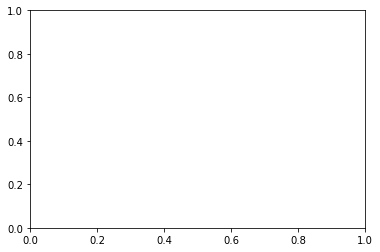

In [52]:
plot_tree(model,  num_trees=1)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

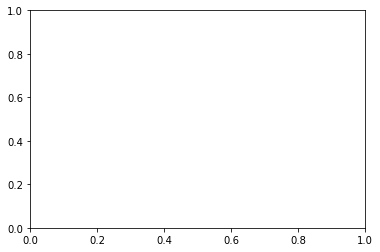

In [47]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(19, 11)
plt.show()
